In [26]:
import numpy as np
from matplotlib import pyplot as plt
c = 3*10^8                 # m/s
G = 6.67*10**(-11)         # Nm^2/kg^2
u0 = 4*np.pi*10**(-7)      # N/A^2
eps0 = 8.85*10**(-12)        # C^2/(N*m^2)
e = 1.6*10**(-19)          # C
mp = 1.67*10**(-19)        # kg
me = 9.11*10**(-31)        # kg
Msun = 2*10**(30)          # kg
sigma = 6*10**22           # Hz

class Star:
    def __init__(self, M, w, R, M_frac):
        self.M = M
        self.w = w
        self.R = R
        self.N = M_frac*M/(mp+me)
    def L(self):
        return (2/5)*self.M*self.w*self.R**2

def Bgm(N_Star, R_loc):
    M = -(1/2)*N_Star.L()*np.sqrt(G)/c
    return np.array([2*M*np.sin(R_loc[1])/(R_loc[0])**3, M*np.sin(R_loc[1])/(R_loc[0]**3), 0])

def Generate_Loops(Nl, N_Star):
    Cyl_loops_r = np.arange(.1, N_Star.R +1, N_Star.R/Nl)
    Cyl_loops_z = np.arange(-N_Star.R, N_Star.R + 1,  N_Star.R/Nl)
    #print(Cyl_loops_z)
    Loops = []
    L = 0
    #k = 0
    for r in Cyl_loops_r:
        for z in Cyl_loops_z:
            if r**2 + z**2 <= N_Star.R**2:
                Loops.append([r,z])
    i = 0
    while i < len(Loops):
        k = Loops[i]
        L = L + 2*np.pi*k[0]
        i = i + 1
        #print(L)
    i = 0
    while i < len(Loops):
        Loops[i] = Loops[i]+[N_Star.N/(L)]
        i = i + 1
    #print(Loops)
    return Loops

def J_init(N_Star, loop):
    n = loop[2]
    #print(n)
    R_loc = np.array([loop[0], np.arctan(np.sqrt(loop[0]**2+loop[1]**2))/loop[1],0])
    if R_loc[1] >= 1000:
        R_loc[1] = 0
    i = 0
    v = R_loc[0]*N_Star.w*np.array([0,0,1])
    lc = e*n
    return R_loc, v, lc

def B_em(Loop, Point):
    Bi = 0
    #Q = Loop[0][0]/(np.pi/50)
    Bi = (u0/(4*np.pi*(Point[0] - Loop[0][0])**3))*np.cross(Loop[1], (Point - Loop[0]))    
    Bi = Bi*Loop[2]*Loop[0][0]*2*np.pi
    return Bi

def ElectromagneticBE(N_Star, Nl, deltaT, Point):
    dt = .1
    Nsteps = deltaT/dt
    Loops = Generate_Loops(Nl, N_Star)
    k = 0
    e_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        e_descrip = np.array([R, v, I])
        if R[0] < N_Star.R:
            e_loops.append(e_descrip)
        k = k + 1
    k = 0
    p_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        #print(R)
        #print(v)
        p_descrip = np.array([R, v, I])
        p_loops.append(p_descrip)
        k = k + 1
    k = 0
    
    #E = 0
    #while k < len(p_loops):
    #    #print(Loops[k][2])
    #    Ei = p_loops[k][2]*np.array([0,0,1]) - (1/c)*np.cross(p_loops[k][1], Bgm(N_Star, p_loops[k][0]))
    #    E = E + Ei
    #    k = k + 1
    #k = 0
    Bem = 0
    #print(p_loops)
    while k < len(p_loops):
        Bi = B_em(p_loops[k], Point)
        k = k + 1
        Bem = Bem + Bi
    print("Bgm = ", Bgm(N_Star, Point))
    print("Bem = ", Bem)
    #print(Bem[0]/Bgm(N_Star, Point)[0])
    #print(Bem[1]/Bgm(N_Star, Point)[1])
    return (Bem, Bgm(N_Star, Point))

In [75]:
P_fracs = np.arange(0, .11, .005)
log10Bsemr = P_fracs*0
log10Bsemtheta = P_fracs*0
log10Bsgmr = P_fracs*0
log10Bsgmtheta = P_fracs*0
log10Br = P_fracs*0
log10Btheta = P_fracs*0
print(log10Bsemr[0])
i = 0
for p in P_fracs:
    Starp = Star(1.4*Msun, 400, 20000, p)
    Bcoupled = ElectromagneticBE(Starp, 100, 1, np.array([20000, np.pi/2, 0]))
    Bemi = Bcoupled[0]
    Bgmi = Bcoupled[1]
    print(p)
    #print(Bemi, Bgmi)
    log10Bsemr[i] = np.log10(np.abs(Bemi))[0]
    log10Bsgmr[i] = np.log10(np.abs(Bgmi))[0]
    log10Bsemtheta[i] = np.log10(np.abs(Bemi))[1]
    log10Bsgmtheta[i] = np.log10(np.abs(Bgmi))[1]
    log10Br[i] = np.log10(np.abs(Bgmi+Bemi))[0]
    log10Btheta[i] = np.log10(np.abs(Bemi+Bgmi))[1]
    #print(log10Bsem[i], log10Bsgm[i])
    i = i + 1

0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [0. 0. 0.]
0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.17619646e+19  2.40002088e+21  0.00000000e+00]
0.005
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-2.35239292e+19  4.80004175e+21  0.00000000e+00]
0.01
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-3.52858938e+19  7.20006263e+21  0.00000000e+00]
0.015
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-4.70478584e+19  9.60008351e+21  0.00000000e+00]
0.02
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-5.88098230e+19  1.20001044e+22  0.00000000e+00]
0.025
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-7.05717876e+19  1.44001253e+22  0.00000000e+00]
0.03
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-8.23337522e+19  1.68001461e+22  0.00000000e+00]
0.035
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-9.40957168e+19  1.92001670e+22  0.00000000e+00]
0.04
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.0

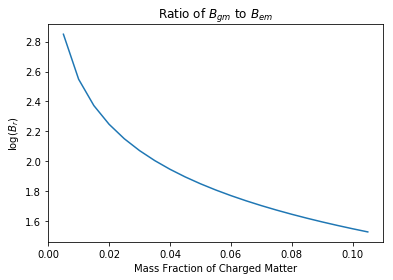

In [76]:
plt.plot(P_fracs, log10Bsgmr - log10Bsemr)
plt.title("Ratio of $B_{gm}$ to $B_{em}$")
plt.ylabel("log($B_r$)")
plt.xlabel("Mass Fraction of Charged Matter")
plt.show()

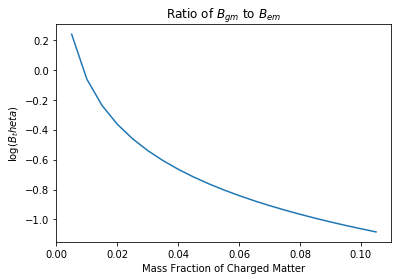

In [77]:
plt.plot(P_fracs, log10Bsgmtheta - log10Bsemtheta)
plt.title("Ratio of $B_{gm}$ to $B_{em}$")
plt.ylabel("log($B_theta$)")
plt.xlabel("Mass Fraction of Charged Matter")
plt.show()

In [78]:
P_fracs = np.arange(0, .01, .0005)
log10Bsemr = P_fracs*0
log10Bsemtheta = P_fracs*0
log10Bsgmr = P_fracs*0
log10Bsgmtheta = P_fracs*0
log10Br = P_fracs*0
log10Btheta = P_fracs*0
print(log10Bsemr[0])
i = 0
for p in P_fracs:
    Starp = Star(1.4*Msun, 400, 20000, p)
    Bcoupled = ElectromagneticBE(Starp, 100, 1, np.array([20000, np.pi/2, 0]))
    Bemi = Bcoupled[0]
    Bgmi = Bcoupled[1]
    print(p)
    #print(Bemi, Bgmi)
    log10Bsemr[i] = np.log10(np.abs(Bemi))[0]
    log10Bsgmr[i] = np.log10(np.abs(Bgmi))[0]
    log10Bsemtheta[i] = np.log10(np.abs(Bemi))[1]
    log10Bsgmtheta[i] = np.log10(np.abs(Bgmi))[1]
    log10Br[i] = np.log10(np.abs(Bgmi+Bemi))[0]
    log10Btheta[i] = np.log10(np.abs(Bemi+Bgmi))[1]
    #print(log10Bsem[i], log10Bsgm[i])
    i = i + 1

0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [0. 0. 0.]
0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.17619646e+18  2.40002088e+20  0.00000000e+00]
0.0005
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-2.35239292e+18  4.80004175e+20  0.00000000e+00]
0.001
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-3.52858938e+18  7.20006263e+20  0.00000000e+00]
0.0015
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-4.70478584e+18  9.60008351e+20  0.00000000e+00]
0.002
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-5.88098230e+18  1.20001044e+21  0.00000000e+00]
0.0025
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-7.05717876e+18  1.44001253e+21  0.00000000e+00]
0.003
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-8.23337522e+18  1.68001461e+21  0.00000000e+00]
0.0035
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-9.40957168e+18  1.92001670e+21  0.00000000e+00]
0.004
Bgm =  [-8.31549783e+21 -4.15774891e

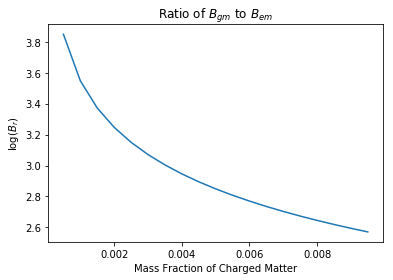

In [79]:
plt.plot(P_fracs, log10Bsgmr - log10Bsemr)
plt.title("Ratio of $B_{gm}$ to $B_{em}$")
plt.ylabel("log($B_r$)")
plt.xlabel("Mass Fraction of Charged Matter")
plt.show()

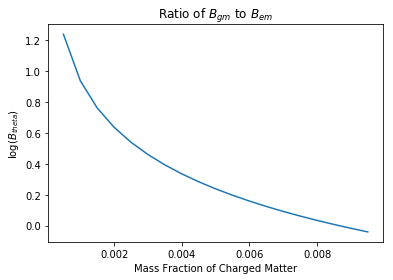

In [80]:
plt.plot(P_fracs, log10Bsgmtheta - log10Bsemtheta)
plt.title("Ratio of $B_{gm}$ to $B_{em}$")
plt.ylabel("log($B_{theta}$)")
plt.xlabel("Mass Fraction of Charged Matter")
plt.show()